In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.3.0


In [4]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteY7QN6F/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteY7QN6F/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteY7QN6F/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 47s 60ms/step - loss: 0.5862 - accuracy: 0.6637 - val_loss: 0.3855 - val_accuracy: 0.8347
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 0.3386 - accuracy: 0.8624 - val_loss: 0.3470 - val_accuracy: 0.8463
Epoch 3/10
782/782 [==============================] - 47s 59ms/step - loss: 0.2601 - accuracy: 0.9000 - val_loss: 0.3755 - val_accuracy: 0.8390
Epoch 4/10
782/782 [==============================] - 47s 60ms/step - loss: 0.2188 - accuracy: 0.9192 - val_loss: 0.4164 - val_accuracy: 0.8387
Epoch 5/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1753 - accuracy: 0.9389 - val_loss: 0.4840 - val_accuracy: 0.8300
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1368 - accuracy: 0.9537 - val_loss: 0.4749 - val_accuracy: 0.8317
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1091 - accuracy: 0.9647 - val_loss: 0.5690 - val_accuracy:

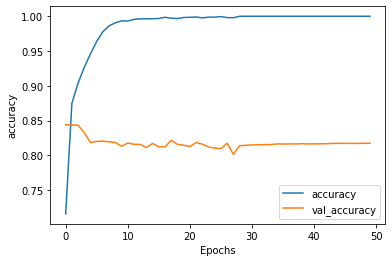

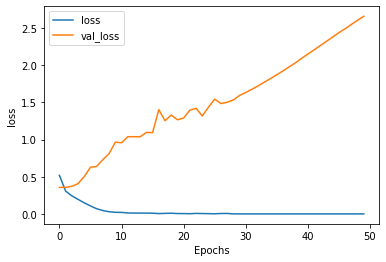

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Epoch 1/10
782/782 [==============================] - 47s 61ms/step - loss: 0.4893 - accuracy: 0.7560 - val_loss: 0.3621 - val_accuracy: 0.8466
Epoch 2/10
782/782 [==============================] - 47s 60ms/step - loss: 0.3010 - accuracy: 0.8788 - val_loss: 0.3893 - val_accuracy: 0.8233
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2420 - accuracy: 0.9101 - val_loss: 0.3991 - val_accuracy: 0.8375
Epoch 4/10
782/782 [==============================] - 47s 60ms/step - loss: 0.2022 - accuracy: 0.9263 - val_loss: 0.4149 - val_accuracy: 0.8292
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1680 - accuracy: 0.9408 - val_loss: 0.4429 - val_accuracy: 0.8305
Epoch 6/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1418 - accuracy: 0.9506 - val_loss: 0.4914 - val_accuracy: 0.8167
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1248 - accuracy: 0.9577 - val_loss: 0.5341 - val_accuracy:

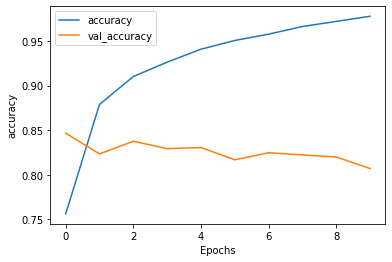

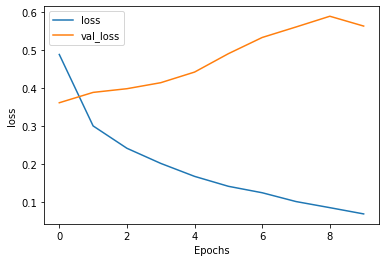

In [13]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Epoch 1/10
782/782 [==============================] - 9s 11ms/step - loss: 0.4507 - accuracy: 0.7781 - val_loss: 0.3464 - val_accuracy: 0.8484
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2808 - accuracy: 0.8861 - val_loss: 0.3579 - val_accuracy: 0.8448
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2303 - accuracy: 0.9102 - val_loss: 0.3849 - val_accuracy: 0.8365
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1933 - accuracy: 0.9270 - val_loss: 0.4214 - val_accuracy: 0.8322
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1654 - accuracy: 0.9391 - val_loss: 0.4750 - val_accuracy: 0.8284
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1378 - accuracy: 0.9528 - val_loss: 0.5436 - val_accuracy: 0.8248
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1130 - accuracy: 0.9623 - val_loss: 0.5991 - val_accuracy: 0.8169

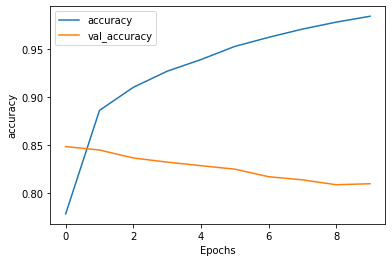

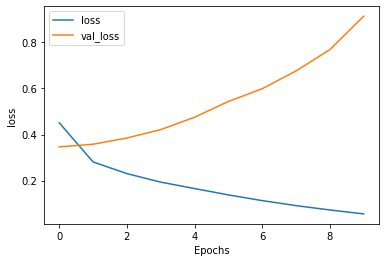

In [14]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')